* scatter plots are great at showing correlation between multiple variables

In [11]:
data = {
    "job_skills": ["Python", "SQL", "Excel", "Power BI", "Tableau", "R", "Java", "AWS", "Git", "Docker"],
    "skill_count": [120, 95, 85, 70, 65, 40, 55, 60, 80, 50],
    "skill_pay": [95000, 88000, 72000, 85000, 83000, 80000, 90000, 98000, 87000, 94000]
}

df = pd.DataFrame(data)
df

,job_skills,skill_count,skill_pay
0,Python,120,95000
1,SQL,95,88000
2,Excel,85,72000
3,Power BI,70,85000
4,Tableau,65,83000
5,R,40,80000
6,Java,55,90000
7,AWS,60,98000
8,Git,80,87000
9,Docker,50,94000


<Axes: xlabel='skill_count', ylabel='skill_pay'>

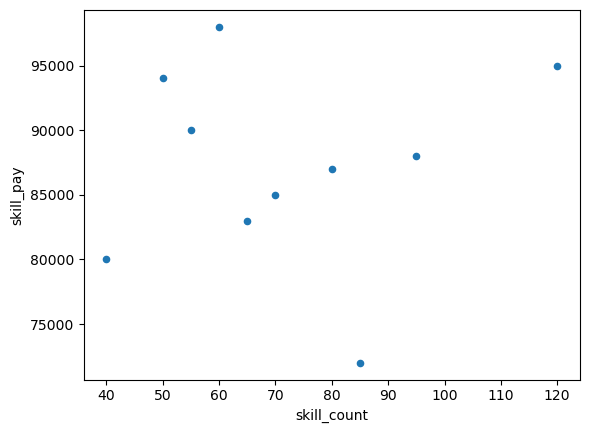

In [10]:
df.plot(kind='scatter', x= 'skill_count', y= 'skill_pay')

* let's see how median salary and also demand /count of a skill correlate to each other 

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

df = pd.read_csv(r"C:\Users\HP\Desktop\ASHFA\data_jobs.csv")

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [34]:
df = df[df['job_title_short'] == 'Data Analyst']

In [42]:
df_exploded = df.explode('job_skills')

skill_stats= df_exploded.groupby('job_skills').agg(
    skill_count = ('job_skills' , 'count'),
    median_salary = ('salary_year_avg', 'median')
)

skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(10)
skill_stats

,skill_count,median_salary
job_skills,,
sql,92428,92500.0
excel,66860,84479.0
python,57190,98500.0
tableau,46455,95000.0
power bi,39380,90000.0
r,29996,92527.5
sas,27998,90000.0
powerpoint,13822,85000.0
word,13562,80000.0


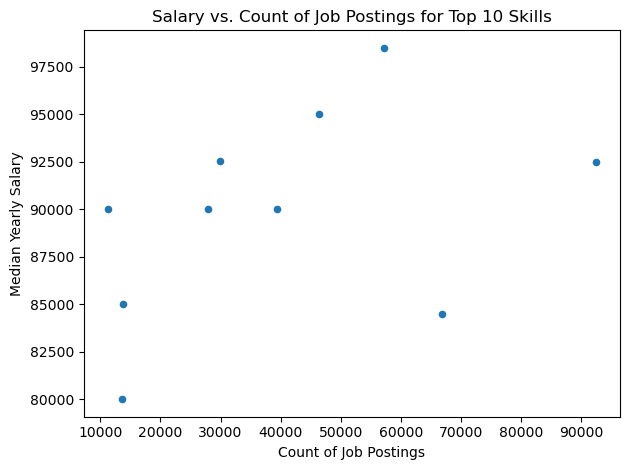

In [46]:
skill_stats.plot(kind='scatter', y='median_salary', x='skill_count')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.tight_layout()
plt.show()

# naming every plot

* matplotlib library doesn't make it easy, but seaborn library does

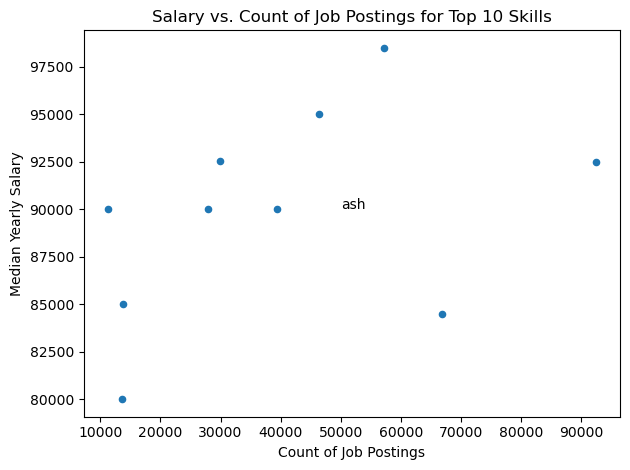

In [50]:
skill_stats.plot(kind='scatter', y='median_salary', x='skill_count')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.tight_layout()
plt.text(50000, 90000, 'ash')

plt.show()

In [51]:
for i, txt in enumerate(skill_stats.index):
    print(i, txt)

0 sql
1 excel
2 python
3 tableau
4 power bi
5 r
6 sas
7 powerpoint
8 word
9 sap


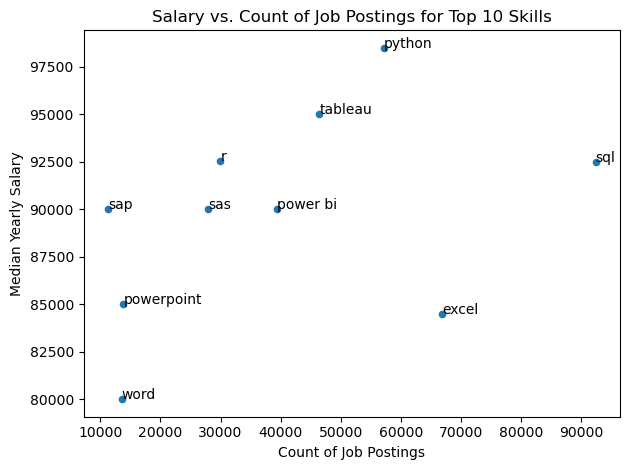

In [52]:
skill_stats.plot(kind='scatter', y='median_salary', x='skill_count')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.tight_layout()

for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)

plt.show()